In [1]:
import re
import os 
import datetime
from math import log
import csv
import pprint
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
from pandas.io.parsers import read_csv
pd.set_option('max_colwidth',120)
from elasticsearch import Elasticsearch, helpers

from __future__ import division

%matplotlib inline

pp = pprint.PrettyPrinter()

In [2]:
#bashcommand='pwd'

In [3]:
es = Elasticsearch([{'host':'atlas-kibana.mwt2.org', 'port':9200}],timeout=10)

In [4]:
indices = es.cat.indices(index='jobs_archive_2016-06-23', h="index", request_timeout=10).split('\n')
indices = sorted(indices)
indices = [x.replace(" ", "") for x in indices if x != '']

In [5]:
print (indices)

['jobs_archive_2016-06-23']


In [6]:
ss={
  "query": { "match": { "computingsite": "*IN2P3-CC*" } },
  "_source": ["pandaid","batchid","avgpss","computingsite","cpu_eff","cpuconsumptiontime","wall_time","totaljobtime","modificationhost"],
    "size": 9000
    }



#ss= {"query": { "match_all": {} },"size": 10000} 



In [7]:
res = es.search(index='jobs_archive_2016-06-26', body=ss, request_timeout=12000)

In [8]:

type(res)
list2=[]
list=[]
list=res.get('hits').get('hits')
#type(list2)
type(list)

list

In [9]:


#rint (res.get('hits').get('hits'))
#list.head()
#res[0]
#res['total']

In [10]:
for name in list:
 #print (name.get('_source'))
 a=name.get('_source')
 list2.append(a)
#xx=list2.append(dict(a))
dfu = pd.DataFrame(list2)
    
dfu.avgpss.count()

2356

In [11]:
dfu.head()

,avgpss,batchid,computingsite,cpu_eff,cpuconsumptiontime,modificationhost,pandaid,wall_time
0,1002584,9889987,IN2P3-CC,0.857639,741,ccwsge0762,2900509579,864
1,1739498,9870516,IN2P3-CC,0.976818,10408,ccwsge0800,2899976233,10655
2,1699103,9874795,IN2P3-CC,0.977565,11416,ccwsge0762,2899999755,11678
3,1881052,9874796,IN2P3-CC,0.968328,10242,ccwsge0929,2899999757,10577
4,1876856,9874794,IN2P3-CC,0.971301,11101,ccwsge0095,2899999749,11429


In [12]:
 dfu.groupby(['computingsite']).count()

,avgpss,batchid,cpu_eff,cpuconsumptiontime,modificationhost,pandaid,wall_time
computingsite,,,,,,,
IN2P3-CC,2356,2356,2356,2356,2356,2356,2356


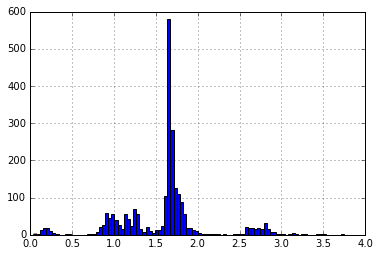

In [13]:
b=dfu.avgpss/1024/1024
b.hist(bins=100)

In [14]:
dfu.memory_usage()

Index                    80
avgpss                18848
batchid               18848
computingsite         18848
cpu_eff               18848
cpuconsumptiontime    18848
modificationhost      18848
pandaid               18848
wall_time             18848
dtype: int64